Dans la cryprographie ancienne on trouve le chiffrement de César qui consiste à faire l'opération suivante pour crypter un texte :

lettre codée = lettre claire + n (modulo 26)

n étant la clé secrète du code, par exemple si n = 4, la lettre A (qui a le numéro 1 dans l'ordre alphabétique) du texte claire devient E dans le texte codé (E a le numéro 1+4=5 dans l'ordre alphabétique). 

Le décryptage consiste à faire l'opération invese : 

lettre claire  = lettre codée - n (modulo 26)



In [ ]:
import matplotlib.pyplot as plt

#----------------------------------------------------------------------------
alphabet="ABCDEFGHIJKLMNOPQRSTUVWXYZ"

def code_cesar(m,n):
    code=""
    l=len(m)
    for i in range(l):
        j=0
        while(j<26 and m[i]!=alphabet[j]):
            j+=1
        code=code+alphabet[(j+n)%26]
    return code
#----------------------------------------------------------------------------
def decrypt_cesar(m,n):
    code=""
    l=len(m)
    for i in range(l):
        j=0
        while(j<26 and m[i]!=alphabet[j]):
            j+=1
        code=code+alphabet[(j-n)%26]
    return code  

Pour décrypter un message sachant qu'il a été crypté avec le chiffrement de César mais sans disposer de la clé secrète, on aura besoin de faire une analyse de fréquence des lettres du code et la comparer avec les fréquences des lettres dans la langue française. E est la lettre la plus fréquente, suivie par A ...

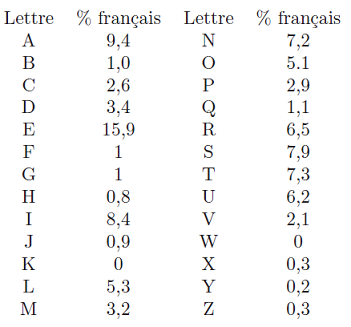

In [ ]:
#---------------------------Analyse de fréquences---------------------------------
def not_occure(liste, caracter):
    j=0
    while j<len(liste) and caracter!=liste[j]:
        j+=1
    return j==len(liste) #si True donc caracter ne figure pas dans liste
#----
def sans_rep(liste, caracter):#si caracter ne figure pas dans liste on l'ajoute
    if not_occure(liste, caracter):
        liste.append(caracter)
#----
def m_sans_rep(message):#liste des lettres qui figure dans message
    l=len(message)
    liste=[message[0]]
    for i in range(1,l): 
        sans_rep(liste, message[i])
    return liste  
#----
def stat_occ(code):
    l=len(code)
    liste=[]
    compteur=[]
    for i in range(l):  
        if not_occure(liste, code[i]): #si code[i] ne figure pas dans liste
            compteur.append((code.count(code[i])*100)/l) #le % d'occurence de code[i] 
            liste.append(code[i]) #placer code[i] dans liste pour ne plus le réutiliser
    return compteur
#----------------------------------------------------------------------------
def affiche_stat(code):
    width = 0.5
    plt.bar(m_sans_rep(code), stat_occ(code), width, color='m' )
    plt.ylabel("Occurence en %")
    plt.title("Statistique d'occurence")
    plt.show()  
#---------------------------------------------------------------------------

Imaginant que je veux envoyer ce message, top secret, à mon pote :

"ne dis à personne que j'aime manger les cacahuètes".   

Et on se met d'accord sur la clé secrète n=7, c'est à dire qu'on fera le décalage de 7 lettres pour chaque lettre de notre message clair.

In [ ]:
message='NEDISAPERSONNEQUEJAIMEMANGERLESCACAHETES'
code_cesar(message,7)

'ULKPZHWLYZVUULXBLQHPTLTHUNLYSLZJHJHOLALZ'

Donc je vais envoyer à mon pote "ULKPZHWLYZVUULXBLQHPTLTHUNLYSLZJHJHOLALZ" espérant qu'il comprendra ! 

Supposant maintenant que vous êtes un agent secret et que vous venez de détecter le message suivant :

'OJXZNXIJXTQJOJSJUJZCUFXAJSNWFQFWJZSNTS' 

vous supposez qu'il a été codé avec le code de César, et vous allez essayer de trouver la clé secrète pour le décrypter, allons y. 



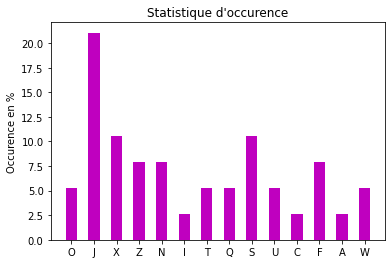

In [ ]:
crypte='OJXZNXIJXTQJOJSJUJZCUFXAJSNWFQFWJZSNTS'

#On affiche les fréquences d'occurence des différentes lettres du message crypté. 
affiche_stat(crypte)

Dans ce message crypté J est la lettre la plus fréquente, on peut dire qu'elle correspond à la lettre E dans le message clair. Si c'est le cas, le décalage a été fait avec 5 lettres, donc il se peut que la clé secrète du code de César est 5. On a qu'à tester :

In [ ]:
decrypt_cesar(crypte,5)

'JESUISDESOLEJENEPEUXPASVENIRALAREUNION'

Avec un peu d'effort on peut lire : 'Je suis desolé je ne peux pas venir à la réunion'.